In [20]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
np.random.seed(777)

In [22]:
OHE_scaled = pd.read_csv('../../data/OHE_scaled_target.csv')
X = OHE_scaled.loc[:, OHE_scaled.columns != 'Target']
y = OHE_scaled['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

selector = SelectKBest(score_func=f_classif, k='all')
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

c:\Users\Felipe Castro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [113 120 183 189 192 197 198 218] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Felipe Castro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [23]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
accuracy = clf.score(X_test, y_test)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.71


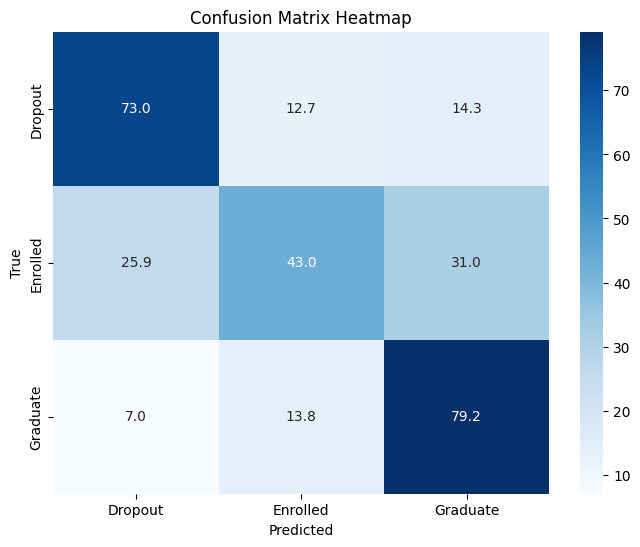

In [25]:
y_pred = clf.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=['Dropout', 'Enrolled', 'Graduate'])
labels = ['Dropout', 'Enrolled', 'Graduate']

cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.xticks(np.arange(len(labels)) + 0.5, labels)
plt.yticks(np.arange(len(labels)) + 0.5, labels)
plt.show()